<a href="https://colab.research.google.com/github/Obafemi-Oluwadolapo/Hamoye-Data-Internship-Fall-23/blob/main/Oluwadolapo_hamoye_ds_quiz2ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb

In [ ]:
df = pd.read_excel('/content/sample_data/energydata_complete.xlsx')

In [ ]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# QUESTION 17

In [ ]:
# Select a sample of the dataset
simple_linear_reg_df = df[['T2','T6']]

<Axes: xlabel='T2', ylabel='T6'>

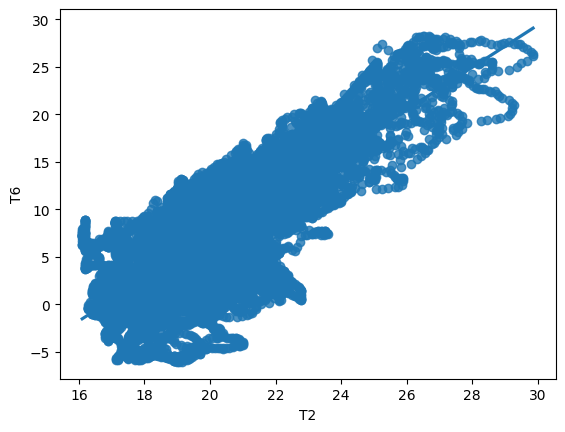

In [ ]:
# Regression plot
sb.regplot(x="T2", y="T6",
           data=simple_linear_reg_df)

In [ ]:
heating_target = simple_linear_reg_df['T6']
x = simple_linear_reg_df.drop(columns=['T6'])

In [ ]:
#Now, we split our dataset into the training and testing dataset. Recall that wehad earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    heating_target,test_size=0.3, random_state=1)

In [ ]:
# LinearRegression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
# fit the model to the training dataset
linear_model.fit(x_train, y_train)
# Obtain predictions
predicted_values = linear_model.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

3.612

# QUESTION 18

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19735 non-null  datetime64[ns]
 1   Appliances   19735 non-null  int64         
 2   lights       19735 non-null  int64         
 3   T1           19735 non-null  float64       
 4   RH_1         19735 non-null  float64       
 5   T2           19735 non-null  float64       
 6   RH_2         19735 non-null  float64       
 7   T3           19735 non-null  float64       
 8   RH_3         19735 non-null  float64       
 9   T4           19735 non-null  float64       
 10  RH_4         19735 non-null  float64       
 11  T5           19735 non-null  float64       
 12  RH_5         19735 non-null  float64       
 13  T6           19735 non-null  float64       
 14  RH_6         19735 non-null  float64       
 15  T7           19735 non-null  float64       
 16  RH_7

In [ ]:
def dt64_to_float(dt64):
...     year = dt64.astype('M8[Y]')
...     days = (dt64 - year).astype('timedelta64[D]')
...     year_next = year + np.timedelta64(1, 'Y')
...     days_of_year = (year_next.astype('M8[D]') - year.astype('M8[D]')).astype('timedelta64[D]')
...     dt_float = 1970 + year.astype(float) + days / (days_of_year)
...     return dt_float

>>> df['date'] = dt64_to_float(df['date'].to_numpy())
>>> x = df['date'].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
#data = norm_df.drop(columns=['date','lights'])
data = norm_df.drop(columns=['date','lights','Appliances'])
target=norm_df['Appliances']

In [ ]:
#Now, we split our dataset into the training and testing dataset. Recall that wehad earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data,
                                                    target,test_size=0.3, random_state=42)

In [ ]:
data.head()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,0.381691,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,0.381691,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,0.380037,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,0.380037,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261
4,0.32735,0.531419,0.225345,0.676727,0.215188,0.758685,0.341441,0.762697,0.178691,0.380037,...,0.219563,0.671909,0.357985,0.106977,0.894737,0.404762,0.717949,0.520362,0.201611,0.201611


In [ ]:
# LinearRegression model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
# fit the model to the training dataset
linear_model.fit(x_train, y_train)
# Obtain predictions
predicted_values = linear_model.predict(x_test)

In [ ]:
#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3)

0.05

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.088

In [ ]:
# R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predicted_values)
round(r2, 3)

0.149

In [ ]:
# Ridge
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.5)

In [ ]:
# Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001)

In [ ]:
# RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,3)

0.088